<a href="https://colab.research.google.com/github/aerimili/EIE401-1-Multimedia/blob/main/Actividades/Actividad_3/Actividad_3_VillalobosAlejandra_20914803-K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Alejandra Villalobos</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
En teoría, cualquier imagen puede ser reconstruida a partir de ondas senoidales. Es bueno entender como podemos generar una imagen que nos muestra una onda senoidal.


In [3]:
f1 = 2 #Frecuencia de seno en Hz
f2 = 5 #Frecuencia de coseno en Hz
A = 1 #Amplitud de la señal
fs = 60 #Frecuencia de muestreo
t_inicio = 0
t_final = 1
t = np.linspace(t_inicio, t_final, fs) #Creación del vector tiempo
signal = A*np.sin(2*np.pi*f1*t) + A*np.cos(2*np.pi*f2*t) #Señal senoidal

In [ ]:
#Grafica de señal senoidal
plt.plot(t, signal)
plt.title("Señal senoidal")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")

In [5]:
#Creación de representacion 2D de la señal
X, Y = np.meshgrid(t, t)
grating = A*np.sin(2*np.pi*f1*X) + A*np.cos(2*np.pi*f2*Y)

In [ ]:
#Gráfica de la imagen 2D de la señal
plt.imshow(grating, cmap = "gray")
plt.title("Imágen que representa la señal sinusoidal")

La imágen nos muestra una representación en 2D de la señal senoidal.

## 2. Generar señales


### 2. Genera una señal: estas señales las vas a utilizar en los puntos siguientes

Genera la señal $$ sinx+cos2x $$ y graficala.


In [7]:
x = np.linspace(-5, 5, 60) #Creación de vector x

señal = np.sin(x) + np.cos(2*x) #Señal senoidal pedida

In [ ]:
#Gráfica de la señal pedida
plt.plot(x, señal)
plt.title("Señal senoidal sin(x) + cos(2x)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")

### 2.2 Genera otra señal no pura como la anterior, sino con ruido gaussiano añadido.

In [9]:
f3 = 5 #Frecuencia de seno en Hz
f4 = 3 #Frecuencia de coseno en Hz
señal2 = 2*np.sin(2*np.pi*f3*t+2) + np.cos(2*np.pi*f4*t) #Señal creada original

def gaussian(x, mu, sigma):
  """
  Calcula el valor de la función gaussiana.

  Parámetros:
  x: Datos con los que se evalúa la función.
  mu: Media de la distribución gaussiana.
  sigma: Desviación estándar de la distribución gaussiana.
  """
  fx = (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sigma**2)) #Fórmula de función gaussiana
  return fx

datos = np.random.random(len(señal2)) #Creación de datos aleatorios

ruido = gaussian(datos,0,0.5) #Generación de ruido gaussiano usando la función gaussiana

señal2_ruido = señal2 + ruido #Señal creada con ruido gaussiano agregado

In [ ]:
#Gráfica de la señal creada original y señal creada con ruido
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(t, señal2)
plt.title("Señal creada original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.subplot(122)
plt.plot(t, señal2_ruido, color = "purple")
plt.title("Señal creada con ruido")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")

La gráfica de la señal creada original muestra las componentes senoidales puras, mientras que la gráfica de la señal con ruido gaussiano muestra cómo el ruido afecta la forma de onda de la señal original, introduciendo fluctuaciones aleatorias en ella.

## 3. Análisis en el dominio de Fourier
<p align="justify">
A partir de las señales anteriores, aplica la transformada de Fourier.    


### 3.1 Obtenga la transformada de Fourier para las señales que generaste en el  punto anterior


In [11]:
def fft(x):
  """
  Calcula la transformada de Fourier de una señal

  Parámetros:
  x: Secuencia de datos de la señal
  """
  N = len(x) #Número de muestras
  X = np.zeros(N, dtype = complex) #Vector salida

  #Calcula la transformada de Fourier para cada frecuencia
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(-2j *np.pi * k * n/N) #Fórmula de transformada de Fourier

  return X

tf1 = fft(señal) #Transformada de Fourier para señal pedida
tf2 = fft(señal2_ruido) #Transformada de Fourier para señal creada con ruido

In [ ]:
#Gráfica de tarnsformada de Fourier de señal pedida y señal creada
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(tf1)
plt.title("Transformada de Fourier de señal pedida")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
plt.subplot(122)
plt.plot(tf2)
plt.title("Transformada de Fourier de señal creada con ruido")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")

Estas gráficas nos muestran las características de frecuencia tanto de la señal pedida como de la señal creada con ruido. Como se puede apreciar en el gráfico de la señal con ruido se ve un aumento de nivel de ruido en todas las frecuencias, así como picos adicionales en el espectro.  

### 3.2 Obten un resultado Normalizado:
Investiga de que se trata un resultado normalizado y encargate de normalizar el resultado del punto 3.1

In [14]:
tf1_norm = np.abs(tf1)/len(señal) #Normalización de TF de señal pedida

tf2_norm = np.abs(tf2) / len(señal2_ruido) #Normalización de TF de señal creada con ruido

In [ ]:
#Gráfica de transformada de Fourier de señales normalizadas
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.plot(tf1_norm)
plt.title("Transformada de Fourier normalizada de señal pedida")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")
plt.subplot(122)
plt.plot(tf2_norm)
plt.title("Transformada de Fourier normalizada de señal creada con ruido")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")

Al normalizar las Transformada de Fourier se proporciona una representación más significativa de las características de frecuencia de las señales, ayuda a evitar interpretaciones erróneas y permite un análisis más preciso de la distribución de energía en el dominio de la frecuencia.

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal de las dos que generaste inicialmente_ En este caso puede usar una librería. Explica en detalle que hace la librería y el resultado que arroja.

In [ ]:
def ifft(x):
  """
  Calcula la transformada de Fourier inversa de una señal

  Parámetros:
  x: Transformada de Fourier de una señal
  """
  N = len(x) #Número de muestras
  X = np.zeros(N, dtype = complex) #Vector salida

  #Calcula la transformada de Fourier inversa para cada frecuencia
  for k in range(N):
    for n in range(N):
      X[k] += x[n] * np.exp(2j *np.pi * k * n/N) #Fórmula de transformada de Fourier inversa

  return X/N

ift1 = ifft(tf1) #Transformada de fourier inversa de señal pedida

In [ ]:
#Gráfica de transformada de Fourier inversa de señal pedida
plt.plot(ift1)
plt.title("Transformada de Fourier inversa de señal pedida")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [V]")

Al aplicar la transformada de Forier inversa se puede observar cómo podemos recuperar la señal que teniamos originalmente a través de su espectro de frecuencias.

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
_solo para una señal de las dos que generaste inicialmente_
Aquí debe implementar el algoritmo de DFT, es decir, NO puedes usar paquetes externos para calcular la transformada.

In [11]:
#Creación de representacion 2D de la señal creada con ruido
X, Y = np.meshgrid(t, t)
señal2_grating = 2*np.sin(2*np.pi*f3*X + 2) + np.cos(2*np.pi*f4*Y)

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Transformada discreta de Fourier en 2D de señal creada con ruido')

<Figure size 640x480 with 0 Axes>

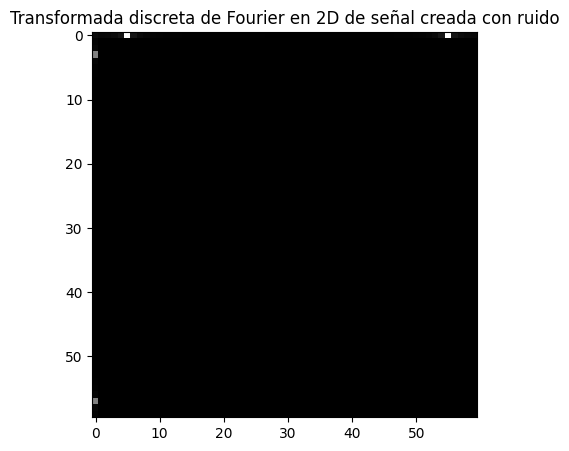

In [32]:
def dft2d(input):
  """
  Calcula la transformada discreta de Fourier en 2D

  Parámetros:
  input: Imágen en 2D de la señal
  """
  M, N = input.shape #Tamaño de la imágen de entrada
  F = np.zeros((M,N), dtype = complex) #Matriz de salida

  #Calcula la transformada discreta de Fourier en 2D
  for u in range(M):
    for v in range(N):
      for k in range(M):
        for n in range(N):
          F[u,v] += input[k,n] * np.exp(-2j * np.pi * ((u*k) / M + (v*n) / N)) #Fórmula de la TDF en 2D

  return F

dft2d_señal2 = dft2d(señal2_grating) #TDF en 2D de la imágen de señal creada con ruido
plt.set_cmap("gray")
plt.figure(figsize = (5,5))
plt.imshow(abs(dft2d_señal2), cmap = "gray")
plt.title("Transformada discreta de Fourier en 2D de señal creada con ruido")

En la imágen entregada podemos ver la representación visual de la transformada de Fourier del grating de la señal creada con ruido.

### 3.5 Explica tus hallazgos
- Explica que diferencia hay entre los dos tipos de ruido generados y el efecto en la onda original.
- Qué representan el resultado de la transformada de fourier para los casos que desarrollaste?

- En el dominio temporal, el ruido se percibe como fluctuaciones en la amplitud de la señal a lo largo del tiempo, abordado con filtrado y suavizado. Mientras, en el dominio frecuencial, el ruido se observa como picos en las amplitudes de ciertas frecuencias, tratado mediante filtrado en frecuencia, eliminación de ruido y análisis de componentes espectrales.

- Caso 1 (señal pedida) = Los componentes de frecuencias de la señal se muestran a tráves de la transformada de Fourierm mientras que el gráfico muestra los picos de frecuencias correspondientes a las componentes senoidales de la señal.

 Caso 2 (señal creada con ruido) = La transformada de Fourier muestra los mismos componentes de frecuencia que su señal sin ruido, pero puede mostrar picos adcionales debido al ruido. Estos picos representarán las frecuencias del ruido y su amplitud puede representar la cantidad de ruido presente en cada frecuencia.





## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html